In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/data.csv")

# Reverse the direction: Country_B becomes source, Country_A becomes target
df_reversed = df.rename(columns={"country_A": "target", "country_B": "source"})


In [ ]:
# Create Directed Graph for each year (Reversed direction)
G_1890_rev = nx.DiGraph()
G_1890_rev.add_edges_from(df_reversed[df_reversed["quote1890"] == 1][["source", "target"]].values)

G_1900_rev = nx.DiGraph()
G_1900_rev.add_edges_from(df_reversed[df_reversed["quote1900"] == 1][["source", "target"]].values)

G_1910_rev = nx.DiGraph()
G_1910_rev.add_edges_from(df_reversed[df_reversed["quote1910"] == 1][["source", "target"]].values)


**Number of nodes and edges**

In [ ]:
def compute_network_statistics(G, year):
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    avg_degree = sum(dict(G.degree()).values()) / num_nodes
    #clustering_global = nx.transitivity(G)  # Global clustering coefficient
    #clustering_avg = sum(nx.clustering(G).values()) / num_nodes  # Avg local clustering
    max_in_degree = max(dict(G.in_degree()).values())
    max_out_degree = max(dict(G.out_degree()).values())

    print(f"\n🔹 Network Statistics for {year}:")
    print(f"   Nodes: {num_nodes}, Edges: {num_edges}")
    print(f"   Average Degree: {avg_degree:.2f}")
    #print(f"   Global Clustering Coefficient: {clustering_global:.4f}")
    #print(f"   Average Clustering Coefficient: {clustering_avg:.4f}")
    print(f"   Max In-Degree: {max_in_degree}, Max Out-Degree: {max_out_degree}")

# Compute for each year
compute_network_statistics(G_1890_rev, 1890)
compute_network_statistics(G_1900_rev, 1900)
compute_network_statistics(G_1910_rev, 1910)



🔹 Network Statistics for 1890:
   Nodes: 45, Edges: 194
   Average Degree: 8.62
   Max In-Degree: 13, Max Out-Degree: 44

🔹 Network Statistics for 1900:
   Nodes: 45, Edges: 218
   Average Degree: 9.69
   Max In-Degree: 13, Max Out-Degree: 44

🔹 Network Statistics for 1910:
   Nodes: 45, Edges: 264
   Average Degree: 11.73
   Max In-Degree: 14, Max Out-Degree: 44


**Degree-Centrality**


🔹 Top 10 Financial Hubs in 1890 (Reversed Network)
   Country  In-Degree  Out-Degree
2      DEU         13          22
3      FRA         11          33
4      GBR          9          44
23     DNK          8           3
0      BEL          7           9
7      AUH          7           9
8      CHE          7           5
11     BRA          6           0
1      ARG          6           0
26     SWE          6           3


<ipython-input-4-493cc6073978>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted["Country"], y=df_sorted["In-Degree"], palette="Blues_d")


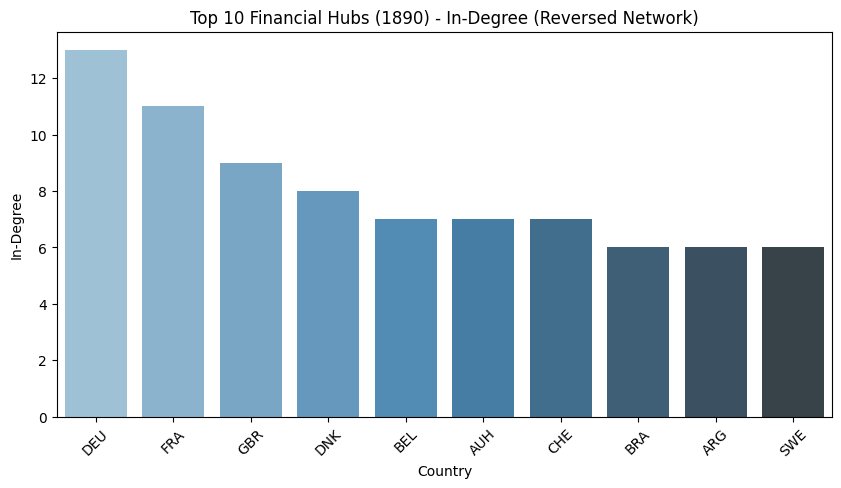

<ipython-input-4-493cc6073978>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted["Country"], y=df_sorted["In-Degree"], palette="Blues_d")



🔹 Top 10 Financial Hubs in 1900 (Reversed Network)
   Country  In-Degree  Out-Degree
3      DEU         13          26
5      GBR         10          44
4      FRA          9          35
24     DNK          9           3
20     HKG          9           6
0      BEL          8          12
8      CHE          7           8
10     NLD          7          12
1      ARG          7           0
14     USA          7          11


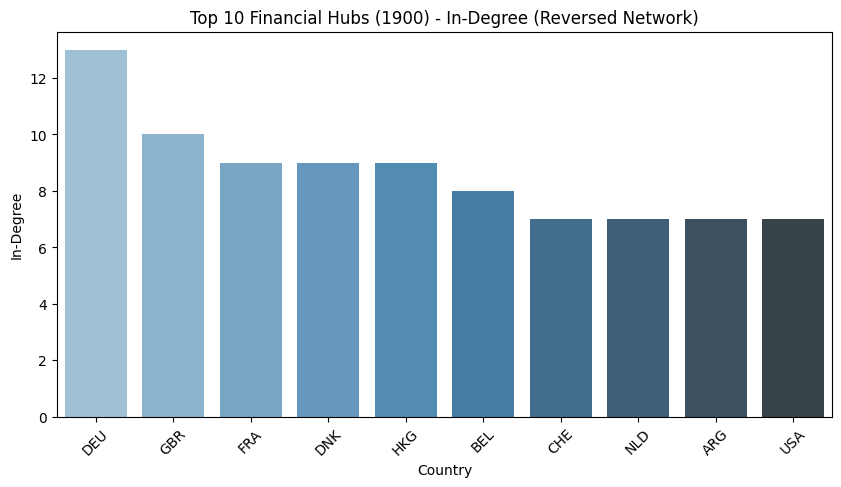


🔹 Top 10 Financial Hubs in 1910 (Reversed Network)
   Country  In-Degree  Out-Degree
3      DEU         14          31
11     NLD         12          16
15     USA         12          19
25     DNK         12           4
5      FRA         11          38
6      GBR         10          44
21     HKG          9           5
7      ITA          9          14
9      CHE          8           9
27     SWE          8           5


<ipython-input-4-493cc6073978>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted["Country"], y=df_sorted["In-Degree"], palette="Blues_d")


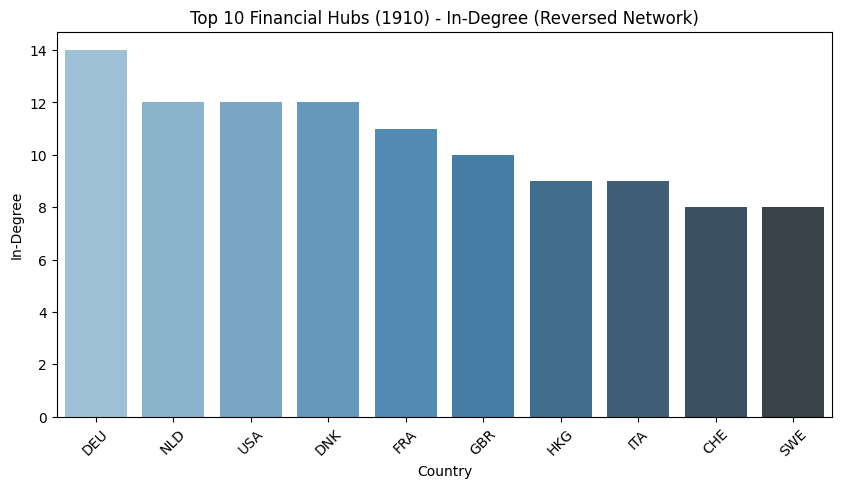

In [ ]:
def compute_degree_distribution(G, year):
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())

    df_degree = pd.DataFrame({
        "Country": list(in_degrees.keys()),
        "In-Degree": list(in_degrees.values()),
        "Out-Degree": list(out_degrees.values())
    })

    df_sorted = df_degree.sort_values(by="In-Degree", ascending=False).head(10)

    print(f"\n🔹 Top 10 Financial Hubs in {year} (Reversed Network)")
    print(df_sorted)

    # Plot Degree Distribution
    plt.figure(figsize=(10, 5))
    sns.barplot(x=df_sorted["Country"], y=df_sorted["In-Degree"], palette="Blues_d")
    plt.title(f"Top 10 Financial Hubs ({year}) - In-Degree (Reversed Network)")
    plt.xlabel("Country")
    plt.ylabel("In-Degree")
    plt.xticks(rotation=45)
    plt.show()

# Compute for each year
compute_degree_distribution(G_1890_rev, 1890)
compute_degree_distribution(G_1900_rev, 1900)
compute_degree_distribution(G_1910_rev, 1910)


**Local Clustering coefficient**

In [ ]:
def compute_clustering_coefficient(G, year):
    clustering_dict = nx.clustering(G)
    df_clustering = pd.DataFrame(clustering_dict.items(), columns=["Country", "Clustering Coefficient"])
    df_sorted = df_clustering.sort_values(by="Clustering Coefficient", ascending=False).head(5)

    print(f"\n🔹 Top 5 Countries by Clustering Coefficient in {year} (Reversed Network)")
    print(df_sorted)

    return df_sorted

df_cluster_1890 = compute_clustering_coefficient(G_1890_rev, 1890)
df_cluster_1900 = compute_clustering_coefficient(G_1900_rev, 1900)
df_cluster_1910 = compute_clustering_coefficient(G_1910_rev, 1910)



🔹 Top 5 Countries by Clustering Coefficient in 1890 (Reversed Network)
   Country  Clustering Coefficient
32     ICH                     1.0
41     ROM                     1.0
42     SER                     1.0
44     VEN                     1.0
37     OTT                     1.0

🔹 Top 5 Countries by Clustering Coefficient in 1900 (Reversed Network)
   Country  Clustering Coefficient
38     OTT                     1.0
42     SER                     1.0
44     VEN                     1.0
22     COL                     1.0
19     CHL                     1.0

🔹 Top 5 Countries by Clustering Coefficient in 1910 (Reversed Network)
   Country  Clustering Coefficient
44     VEN                     1.0
42     SER                     1.0
31     GRC                     1.0
23     COL                     1.0
20     CHL                     1.0


**Centrality Measures**


🔹 Top 10 Financial Centers in 1890 (Reversed Network) - Eigenvector Centrality
   Country  Betweenness Centrality  Closeness Centrality  \
2      DEU                0.092622              0.296970   
3      FRA                0.065199              0.247475   
4      GBR                0.110646              0.222727   
23     DNK                0.011663              0.222727   
0      BEL                0.002596              0.202479   
7      AUH                0.005759              0.202479   
8      CHE                0.000396              0.202479   
26     SWE                0.011099              0.202479   
27     NOR                0.000000              0.202479   
25     RUS                0.000396              0.193676   

    Eigenvector Centrality  
2                 0.343351  
3                 0.290309  
4                 0.247236  
23                0.244019  
0                 0.220615  
7                 0.220615  
8                 0.220615  
26                0.200945 

<ipython-input-6-aea7e5825b7e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Country", y="Eigenvector Centrality", palette="magma")


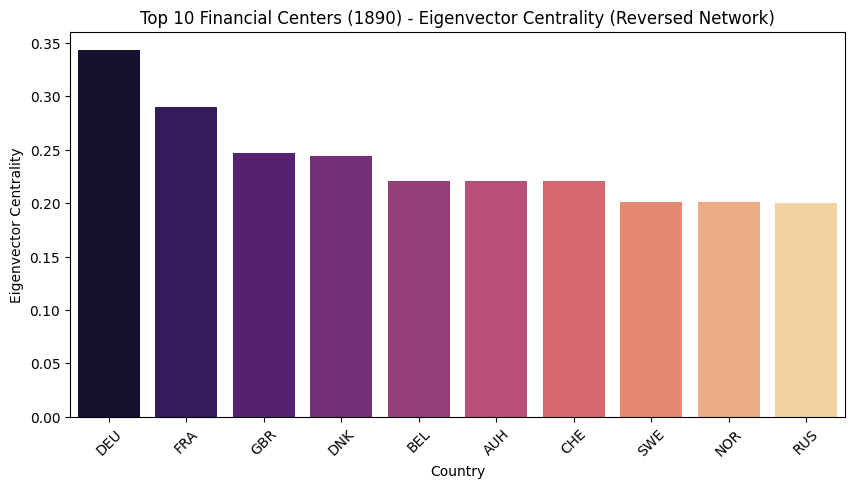


🔹 Top 10 Financial Centers in 1900 (Reversed Network) - Eigenvector Centrality
   Country  Betweenness Centrality  Closeness Centrality  \
3      DEU                0.103705              0.300802   
24     DNK                0.023168              0.243506   
4      FRA                0.046434              0.232438   
5      GBR                0.115274              0.243506   
27     SWE                0.002123              0.222332   
14     USA                0.012172              0.213068   
0      BEL                0.003215              0.222332   
20     HKG                0.023278              0.305556   
8      CHE                0.000458              0.213068   
1      ARG                0.000000              0.245455   

    Eigenvector Centrality  
3                 0.322775  
24                0.247096  
4                 0.242626  
5                 0.238867  
27                0.209291  
14                0.206139  
0                 0.206138  
20                0.204668 

<ipython-input-6-aea7e5825b7e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Country", y="Eigenvector Centrality", palette="magma")


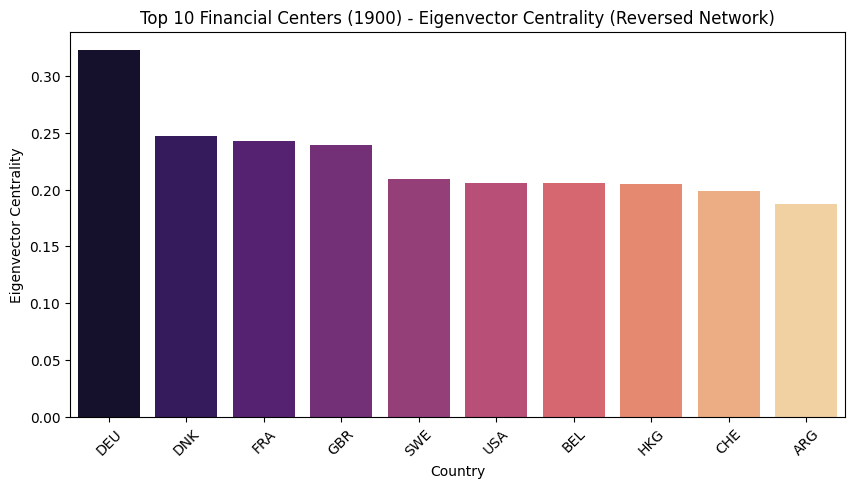


🔹 Top 10 Financial Centers in 1910 (Reversed Network) - Eigenvector Centrality
   Country  Betweenness Centrality  Closeness Centrality  \
3      DEU                0.101064              0.305556   
11     NLD                0.034186              0.289474   
25     DNK                0.024064              0.289474   
15     USA                0.152677              0.323529   
5      FRA                0.077583              0.275000   
6      GBR                0.081462              0.229167   
7      ITA                0.008644              0.261905   
27     SWE                0.002321              0.261905   
9      CHE                0.004724              0.255814   
0      BEL                0.002263              0.220000   

    Eigenvector Centrality  
3                 0.298002  
11                0.271135  
25                0.265934  
15                0.254177  
5                 0.235086  
6                 0.210437  
7                 0.206316  
27                0.203761 

<ipython-input-6-aea7e5825b7e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="Country", y="Eigenvector Centrality", palette="magma")


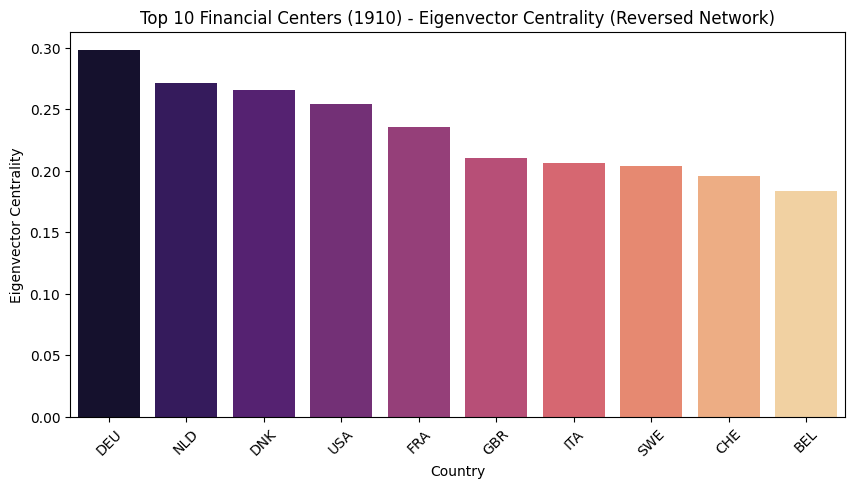

In [ ]:
def compute_centrality(G, year):
    betweenness = nx.betweenness_centrality(G)
    closeness = nx.closeness_centrality(G)
    eigenvector = nx.eigenvector_centrality(G, max_iter=1000)

    df_centrality = pd.DataFrame({
        "Country": list(betweenness.keys()),
        "Betweenness Centrality": list(betweenness.values()),
        "Closeness Centrality": list(closeness.values()),
        "Eigenvector Centrality": list(eigenvector.values())
    })

    df_sorted = df_centrality.sort_values(by="Eigenvector Centrality", ascending=False).head(10)

    print(f"\n🔹 Top 10 Financial Centers in {year} (Reversed Network) - Eigenvector Centrality")
    print(df_sorted)

    # Visualization
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_sorted, x="Country", y="Eigenvector Centrality", palette="magma")
    plt.title(f"Top 10 Financial Centers ({year}) - Eigenvector Centrality (Reversed Network)")
    plt.xlabel("Country")
    plt.ylabel("Eigenvector Centrality")
    plt.xticks(rotation=45)
    plt.show()

# Compute for each year
compute_centrality(G_1890_rev, 1890)
compute_centrality(G_1900_rev, 1900)
compute_centrality(G_1910_rev, 1910)


**Global clustering coefficient**

In [ ]:
# Function to compute global clustering coefficient for reversed network
def compute_global_clustering(G, year):
    global_clustering = nx.transitivity(G)  # Compute global clustering coefficient
    print(f"\n🔹 Global Clustering Coefficient for {year} (Reversed Network): {global_clustering:.4f}")
    return global_clustering

# Compute for each reversed year
df_global_1890_rev = compute_global_clustering(G_1890_rev, 1890)
df_global_1900_rev = compute_global_clustering(G_1900_rev, 1900)
df_global_1910_rev = compute_global_clustering(G_1910_rev, 1910)



🔹 Global Clustering Coefficient for 1890 (Reversed Network): 0.1584

🔹 Global Clustering Coefficient for 1900 (Reversed Network): 0.1773

🔹 Global Clustering Coefficient for 1910 (Reversed Network): 0.2202


In [ ]:
# Function to compute avg local clustering coefficient for directed network
def compute_avg_local_clustering(G, year):
    local_clustering = nx.average_clustering(G)  # Compute avg local clustering coefficient
    print(f"\n🔹 avg local Clustering Coefficient for {year} : {local_clustering:.4f}")
    return local_clustering

# Compute for each reversed year
df_global_1890_rev = compute_avg_local_clustering(G_1890_rev, 1890)
df_global_1900_rev = compute_avg_local_clustering(G_1900_rev, 1900)
df_global_1910_rev = compute_avg_local_clustering(G_1910_rev, 1910)


🔹 avg local Clustering Coefficient for 1890 : 0.6475

🔹 avg local Clustering Coefficient for 1900 : 0.6530

🔹 avg local Clustering Coefficient for 1910 : 0.6658


In [ ]:
df.columns


Index(['country_A', 'country_B', 'quote1890', 'quote1900', 'quote1910',
       'colony', 'dist', 'bitrade', 'gold', 'debtburden', 'rlong',
       'rshort1900', 'rshort1890', 'rgdp', 'rgdpcap', 'poldemo', 'coverage',
       'gold_B', 'debtburden_B', 'rlong_B', 'rshort1900_B', 'rshort1890_B',
       'rgdp_B', 'rgdpcap_B', 'poldemo_B'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_A     1980 non-null   object 
 1   country_B     1980 non-null   object 
 2   quote1890     1980 non-null   int64  
 3   quote1900     1980 non-null   int64  
 4   quote1910     1980 non-null   int64  
 5   colony        1980 non-null   int64  
 6   dist          1980 non-null   float64
 7   bitrade       1980 non-null   float64
 8   gold          1980 non-null   int64  
 9   debtburden    1848 non-null   float64
 10  rlong         1628 non-null   float64
 11  rshort1900    1540 non-null   float64
 12  rshort1890    1540 non-null   float64
 13  rgdp          1980 non-null   float64
 14  rgdpcap       1980 non-null   float64
 15  poldemo       1936 non-null   float64
 16  coverage      1980 non-null   float64
 17  gold_B        1980 non-null   int64  
 18  debtburden_B  1848 non-null 

In [ ]:
df.isnull().sum()

,0
country_A,0
country_B,0
quote1890,0
quote1900,0
quote1910,0
colony,0
dist,0
bitrade,0
gold,0
debtburden,132


**Task 2**

**Sub-task 1**

Analyze the overall structure of the trade network (network topology).

Check if it has small-world properties (using average shortest path length and clustering coefficient).

Compare it to a random network with the same number of nodes and edges.

In [ ]:
# Load dataset
df = pd.read_csv("/content/data.csv")

# Create Directed Graphs for each year
G_1890 = nx.from_pandas_edgelist(df[df["quote1890"] == 1], "country_B", "country_A", create_using=nx.DiGraph())
G_1900 = nx.from_pandas_edgelist(df[df["quote1900"] == 1], "country_B", "country_A", create_using=nx.DiGraph())
G_1910 = nx.from_pandas_edgelist(df[df["quote1910"] == 1], "country_B", "country_A", create_using=nx.DiGraph())

# Print basic network information
print(f"1890 Network: {G_1890.number_of_nodes()} nodes, {G_1890.number_of_edges()} edges")
print(f"1900 Network: {G_1900.number_of_nodes()} nodes, {G_1900.number_of_edges()} edges")
print(f"1910 Network: {G_1910.number_of_nodes()} nodes, {G_1910.number_of_edges()} edges")# Load dataset




1890 Network: 45 nodes, 194 edges
1900 Network: 45 nodes, 218 edges
1910 Network: 45 nodes, 264 edges


In [ ]:
# Function to compute global clustering coefficient for reversed network
def compute_global_clustering(G, year):
    global_clustering = nx.transitivity(G)  # Compute global clustering coefficient
    print(f"\n🔹 Global Clustering Coefficient for {year} (Reversed Network): {global_clustering:.4f}")
    return global_clustering

# Compute for each reversed year
global_1890_rev = compute_global_clustering(G_1890, 1890)
global_1900_rev = compute_global_clustering(G_1900, 1900)
global_1910_rev = compute_global_clustering(G_1910, 1910)


🔹 Global Clustering Coefficient for 1890 (Reversed Network): 0.1584

🔹 Global Clustering Coefficient for 1900 (Reversed Network): 0.1773

🔹 Global Clustering Coefficient for 1910 (Reversed Network): 0.2202


In [ ]:
import networkx as nx

def average_shortest_path(G,year):
  if nx.is_strongly_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
    print(f"\nAverage Shortest Path Length for {year}: {avg_shortest_path:.2f}")
    return avg_shortest_path
  else:
    #print(f"\nAverage Shortest Path Length for {year}: {avg_shortest_path:.2f}")
    largest_component=max(nx.strongly_connected_components(G),key=len)
    G_subgraph = G.subgraph(largest_component)
    avg_shortest_path = nx.average_shortest_path_length(G_subgraph)
    print(f"\n {year} (Largest Strongly connected component) Average Shortest Path Length : {avg_shortest_path:.2f}")


L_1890=average_shortest_path(G_1890,1890)
L_1900=average_shortest_path(G_1900,1900)
L_1910=average_shortest_path(G_1910,1910)


 1890 (Largest Strongly connected component) Average Shortest Path Length : 1.59

 1900 (Largest Strongly connected component) Average Shortest Path Length : 1.60

 1910 (Largest Strongly connected component) Average Shortest Path Length : 2.00


In [ ]:
import networkx as nx

def get_lscc_nodes(G, year):
    # Identify the largest strongly connected component
    lscc = max(nx.strongly_connected_components(G), key=len)

    # Print node count and list
    print(f"\n{year} - Number of nodes in LSCC: {len(lscc)}")
    print(f"{year} - Nodes in LSCC: {sorted(lscc)}")  # Optional: sort for readability

    return lscc

# Call for each year
lscc_1890 = get_lscc_nodes(G_1890, 1890)
lscc_1900 = get_lscc_nodes(G_1900, 1900)
lscc_1910 = get_lscc_nodes(G_1910, 1910)



1890 - Number of nodes in LSCC: 15
1890 - Nodes in LSCC: ['AUH', 'BEL', 'CHE', 'DEU', 'DNK', 'ESP', 'FRA', 'GBR', 'ITA', 'NLD', 'NOR', 'PRT', 'RUS', 'SWE', 'USA']

1900 - Number of nodes in LSCC: 16
1900 - Nodes in LSCC: ['AUH', 'BEL', 'CHE', 'DEU', 'DNK', 'ESP', 'FIN', 'FRA', 'GBR', 'ITA', 'NLD', 'NOR', 'PRT', 'RUS', 'SWE', 'USA']

1910 - Number of nodes in LSCC: 23
1910 - Nodes in LSCC: ['AUH', 'BEL', 'CHE', 'CHN', 'DEU', 'DNK', 'ESP', 'FIN', 'FRA', 'GBR', 'HKG', 'IND', 'ITA', 'JPN', 'NLD', 'NOR', 'PHL', 'PRT', 'RUS', 'SGP', 'SIA', 'SWE', 'USA']


Since the Largest Strongly Connected Component (SCC) was used, this means that the original financial trade network was not fully strongly connected in all years.

A strongly connected graph means every country (node) in the network can reach every other country following directed trade paths.

The fact that we had to extract the Largest SCC means there were weaker connections or isolated components in the financial trade network.

The need to extract the Largest Strongly Connected Component shows that the trade network had some weakly connected or isolated regions.

This means some financial markets were not well integrated into the global trade system.

Instead of a fully connected global system, countries might have started trading more within their own regional financial hubs rather than with the entire network.

In [ ]:
def create_random_network(real_graph, year):
    N = real_graph.number_of_nodes()
    E = real_graph.number_of_edges()
    random_graph = nx.gnm_random_graph(N, E, directed=True)
    print(f"\nRandom Network for {year}: {random_graph.number_of_nodes()} nodes, {random_graph.number_of_edges()} edges")
    return random_graph
# Create random graphs
G_1890_random = create_random_network(G_1890, 1890)
G_1900_random = create_random_network(G_1900, 1900)
G_1910_random = create_random_network(G_1910, 1910)



Random Network for 1890: 45 nodes, 194 edges

Random Network for 1900: 45 nodes, 218 edges

Random Network for 1910: 45 nodes, 264 edges


In [ ]:
from re import L
def average_shortest_path(G,year):
  if nx.is_strongly_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
    print(f"\nAverage Shortest Path Length for {year}: {avg_shortest_path:.2f}")
    return avg_shortest_path
  else:
    #print(f"\nAverage Shortest Path Length for {year}: {avg_shortest_path:.2f}")
    largest_component=max(nx.strongly_connected_components(G),key=len)
    G_subgraph = G.subgraph(largest_component)
    avg_shortest_path = nx.average_shortest_path_length(G_subgraph)
    print(f"\n {year} (Largest Strongly connected component) Average Shortest Path Length : {avg_shortest_path:.2f}")
# Function to compute global clustering coefficient for reversed network
def compute_avg_clustering(G, year):
    avg_clustering = nx.average_clustering(G)  # Compute avg clustering coefficient
    print(f"\nAvg Clustering Coefficient for {year} (Reversed Network): {avg_clustering:.4f}")
    return avg_clustering

print("Real Trade network")
print("Average shortest path")
L_1890=average_shortest_path(G_1890,1890)
L_1900=average_shortest_path(G_1900,1900)
L_1910=average_shortest_path(G_1910,1910)
print("Avg Clustering Coefficient")
global_1890 = compute_avg_clustering(G_1890, 1890)
global_1900 = compute_avg_clustering(G_1900, 1900)
global_1910= compute_avg_clustering(G_1910, 1910)

print("----------------------------------------------------------------------------------")
print("Random network")
L_1890_random=average_shortest_path(G_1890_random,1890)
L_1900_random=average_shortest_path(G_1900_random,1900)
L_1910_random=average_shortest_path(G_1910_random,1910)
print("Avg Clustering Coefficient")
global_1890_random = compute_avg_clustering(G_1890_random, 1890)
global_1900_random = compute_avg_clustering(G_1900_random, 1900)
global_1910_random = compute_avg_clustering(G_1910_random, 1910)


Real Trade network
Average shortest path

 1890 (Largest Strongly connected component) Average Shortest Path Length : 1.59

 1900 (Largest Strongly connected component) Average Shortest Path Length : 1.60

 1910 (Largest Strongly connected component) Average Shortest Path Length : 2.00
Avg Clustering Coefficient

Avg Clustering Coefficient for 1890 (Reversed Network): 0.6475

Avg Clustering Coefficient for 1900 (Reversed Network): 0.6530

Avg Clustering Coefficient for 1910 (Reversed Network): 0.6658
----------------------------------------------------------------------------------
Random network

 1890 (Largest Strongly connected component) Average Shortest Path Length : 2.66

Average Shortest Path Length for 1900: 2.53

Average Shortest Path Length for 1910: 2.31
Avg Clustering Coefficient

Avg Clustering Coefficient for 1890 (Reversed Network): 0.0906

Avg Clustering Coefficient for 1900 (Reversed Network): 0.1125

Avg Clustering Coefficient for 1910 (Reversed Network): 0.1505


The global currency trade network from 1890 to 1910 exhibits strong small-world characteristics. It shows dense local clustering and short trade paths across countries, indicating that regional trade blocs were well-connected yet globally integrated


In [ ]:
import networkx as nx

# Directed graph from 1910 trade network
G = nx.DiGraph()
G.add_edges_from([
    ("Germany", "UK"),
    ("Germany", "USA"),
    #"UK", "USA")  # This extra edge increases clustering
])

# Compute clustering coefficient for Germany
clustering = nx.clustering(G, nodes="Germany")
print("Clustering Coefficient for Germany:", clustering)


Clustering Coefficient for Germany: 0


**Sub-task 2**

In [ ]:
!pip install cdlib python-igraph leidenalg

import networkx as nx
from cdlib import algorithms
import matplotlib.pyplot as plt
#Directed Community Detection using Infomap
def detect_communities_infomap(G, year):
    print(f"\nDetecting communities using Infomap for {year}")

    #Infomap supports directed graph
    partition = algorithms.infomap(G)

    print(f"Number of communities detected: {len(partition.communities)}")
    print("Detected communities:")
    for i, community in enumerate(partition.communities):
        print(f"Community {i+1}: {community}")

    return partition

# For each year's graph
G_1890_partition = detect_communities_infomap(G_1890, 1890)
G_1900_partition = detect_communities_infomap(G_1900, 1900)
G_1910_partition = detect_communities_infomap(G_1910, 1910)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.6/263.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 123.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 101.1 MB/s eta 0:00:00
Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'infomap', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap'}

Detecting communities using Infomap for 1890
Number of communities detected: 4
Detected communities:
Community 1: ['BEL', 'ARG', 'DEU', 'FRA', 'GBR', 'ITA', 'URY', 'AUH', 'CHE', '

Countries in the same coumminity have more directed currency trades among themselves.

If does not mean that every country within the coumminity is connected to every other country.

The probabilty of finding an edge between two countries inside the coummnity is higher than with countires outside the community.

In [ ]:
def leicht_newman_modularity(G, communities):
    """
    Computes Leicht-Newman modularity for directed graph G.

    Parameters:
    - G: networkx.DiGraph
    - communities: List of lists of nodes (from Infomap partition)

    Returns:
    - Q (modularity score)
    """
    m = G.number_of_edges()
    if m == 0:
        return 0

    # Build node → community map
    node_to_community = {}
    for cid, community in enumerate(communities):
        for node in community:
            node_to_community[node] = cid

    Q = 0
    for u in G.nodes():
        for v in G.nodes():
            same_community = node_to_community.get(u) == node_to_community.get(v)
            if same_community:
                A_uv = 1 if G.has_edge(u, v) else 0
                kout = G.out_degree(u)
                kin = G.in_degree(v)
                Q += A_uv - (kout * kin) / m

    return Q / m


In [ ]:
# 1890
Q_1890 = leicht_newman_modularity(G_1890, G_1890_partition.communities)
print("Leicht-Newman Modularity for 1890:", Q_1890)

# 1900
Q_1900 = leicht_newman_modularity(G_1900, G_1900_partition.communities)
print("Leicht-Newman Modularity for 1900:", Q_1900)

# 1910
Q_1910 = leicht_newman_modularity(G_1910, G_1910_partition.communities)
print("Leicht-Newman Modularity for 1910:", Q_1910)


Leicht-Newman Modularity for 1890: 0.1113295780635566
Leicht-Newman Modularity for 1900: 0.15430098476559223
Leicht-Newman Modularity for 1910: 0.14551767676767688


In [ ]:
from cdlib import evaluation

modularity_score_1890 = evaluation.newman_girvan_modularity(G_1890, G_1890_partition)
modularity_score_1900 = evaluation.newman_girvan_modularity(G_1900, G_1900_partition)
modularity_score_1910 = evaluation.newman_girvan_modularity(G_1910, G_1910_partition)

print("Modularity 1890:", modularity_score_1890.score)
print("Modularity 1900:", modularity_score_1900.score)
print("Modularity 1910:", modularity_score_1910.score)


Modularity 1890: -0.29688330322032097
Modularity 1900: -0.28649734870802135
Modularity 1910: -0.27894714187327835


**Task 3**

In [ ]:
#gold_edges=nx.from_pandas_edlist(df[df['glod']==1],"country_B","country_A",create_using=nx.DiGraph())
# Gold Standard Edges
gold_edges = df[(df['gold'] == 1) & (df['gold_B'] == 1)]

# Non-Gold Standard Edges
non_gold_edges = df[(df['gold'] == 0) & (df['gold_B'] == 0)]
#df.head()

In [ ]:
# Gold Standard Networks
G_gold_1890 = nx.from_pandas_edgelist(gold_edges[gold_edges["quote1890"] == 1], "country_B", "country_A", create_using=nx.DiGraph())
G_gold_1900 = nx.from_pandas_edgelist(gold_edges[gold_edges["quote1900"] == 1], "country_B", "country_A", create_using=nx.DiGraph())
G_gold_1910 = nx.from_pandas_edgelist(gold_edges[gold_edges["quote1910"] == 1], "country_B", "country_A", create_using=nx.DiGraph())

# Non-Gold Standard Networks
G_nongold_1890 = nx.from_pandas_edgelist(non_gold_edges[non_gold_edges["quote1890"] == 1], "country_B", "country_A", create_using=nx.DiGraph())
G_nongold_1900 = nx.from_pandas_edgelist(non_gold_edges[non_gold_edges["quote1900"] == 1], "country_B", "country_A", create_using=nx.DiGraph())
G_nongold_1910 = nx.from_pandas_edgelist(non_gold_edges[non_gold_edges["quote1910"] == 1], "country_B", "country_A", create_using=nx.DiGraph())


In [ ]:
# Print basic info
print("=== Gold Networks ===")
print(f"1890: {G_gold_1890.number_of_nodes()} nodes, {G_gold_1890.number_of_edges()} edges")
print(f"1900: {G_gold_1900.number_of_nodes()} nodes, {G_gold_1900.number_of_edges()} edges")
print(f"1910: {G_gold_1910.number_of_nodes()} nodes, {G_gold_1910.number_of_edges()} edges")

print("\n=== Non-Gold Networks ===")
print(f"1890: {G_nongold_1890.number_of_nodes()} nodes, {G_nongold_1890.number_of_edges()} edges")
print(f"1900: {G_nongold_1900.number_of_nodes()} nodes, {G_nongold_1900.number_of_edges()} edges")
print(f"1910: {G_nongold_1910.number_of_nodes()} nodes, {G_nongold_1910.number_of_edges()} edges")


=== Gold Networks ===
1890: 26 nodes, 112 edges
1900: 26 nodes, 125 edges
1910: 26 nodes, 149 edges

=== Non-Gold Networks ===
1890: 10 nodes, 15 edges
1900: 11 nodes, 17 edges
1910: 12 nodes, 17 edges


In [ ]:
def financial_connectivity(G):

  n_nodes=G.number_of_nodes()
  n_edges=G.number_of_edges()
  avg_degree=sum(dict(G.degree()).values())/n_nodes

  clustering_coefficient=nx.transitivity(G)
  avg_clustering_coefficient=sum(nx.clustering(G).values())/n_nodes
  density=n_edges/(n_nodes*(n_nodes-1))

  return avg_degree,clustering_coefficient,density

for year, G_gold,G_nongold in zip ([1890,1900,1910],[G_gold_1890,G_gold_1900,G_gold_1910],[G_nongold_1890,G_nongold_1900,G_nongold_1910]):

  avg_degree_gold,clustering_coefficient_gold,density_gold=financial_connectivity(G_gold)
  avg_degree_nongold,clustering_coefficient_nongold,density_nogold=financial_connectivity(G_nongold)
  print(f"Year: {year}")
  print(f"Average Degree (Gold): {avg_degree_gold:.2f}")
  print(f"Average Degree (Non-Gold): {avg_degree_nongold:.2f}")
  print(f"Clustering Coefficient (Gold): {clustering_coefficient_gold:.4f}")
  print(f"Clustering Coefficient (Non-Gold): {clustering_coefficient_nongold:.4f}")
  print(f"Density (Gold): {density_gold:.4f}")
  print(f"Density (Non-Gold): {density_nogold:.4f}")
  print("\n")


Year: 1890
Average Degree (Gold): 8.62
Average Degree (Non-Gold): 3.00
Clustering Coefficient (Gold): 0.2682
Clustering Coefficient (Non-Gold): 0.2143
Density (Gold): 0.1723
Density (Non-Gold): 0.1667


Year: 1900
Average Degree (Gold): 9.62
Average Degree (Non-Gold): 3.09
Clustering Coefficient (Gold): 0.3012
Clustering Coefficient (Non-Gold): 0.2353
Density (Gold): 0.1923
Density (Non-Gold): 0.1545


Year: 1910
Average Degree (Gold): 11.46
Average Degree (Non-Gold): 2.83
Clustering Coefficient (Gold): 0.3575
Clustering Coefficient (Non-Gold): 0.2857
Density (Gold): 0.2292
Density (Non-Gold): 0.1288




**Subtask 2**

In [ ]:
df.isnull().sum()

,0
country_A,0
country_B,0
quote1890,0
quote1900,0
quote1910,0
colony,0
dist,0
bitrade,0
gold,0
debtburden,132


In [ ]:
numeric_columns = ["debtburden","rlong","rshort1890", "rshort1900","rgdp", "rgdpcap","poldemo"]
print(df[numeric_columns].isnull().sum())

debtburden    132
rlong         352
rshort1890    440
rshort1900    440
rgdp            0
rgdpcap         0
poldemo        44
dtype: int64


In [ ]:
for col in numeric_columns:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

In [ ]:
print(df[numeric_columns].isnull().sum())

debtburden    0
rlong         0
rshort1890    0
rshort1900    0
rgdp          0
rgdpcap       0
poldemo       0
dtype: int64


In [ ]:
def compute_degree_centrality(G, year):
    # Compute In-Degree Centrality and Out-Degree Centrality
    in_deg_cent = nx.in_degree_centrality(G)  # normalized in-degree
    out_deg_cent = nx.out_degree_centrality(G)  # normalized out-degree
    max_in_degree_cent = max(dict(nx.in_degree_centrality(G)).values())
    max_out_degree_cent = max(dict(nx.in_degree_centrality(G)).values())
    # Create DataFrame
    df_degree_cent = pd.DataFrame({
        "Country": list(in_deg_cent.keys()),
        "In-Degree Centrality": list(in_deg_cent.values()),
        "Out-Degree Centrality": list(out_deg_cent.values())
    })

    # Sort by In-Degree Centrality to find the most central nodes
    df_sorted = df_degree_cent.sort_values(by="In-Degree Centrality", ascending=False).head(5)

    print(f"\nTop 5 Financial Hubs by Degree Centrality in {year} (Reversed Network)")
    print(df_sorted)
    print(f"Max In-Degree Centrality: {max_in_degree_cent}")
    print(f"Max Out-Degree Centrality: {max_out_degree_cent}")


compute_degree_centrality(G_1890_rev, 1890)
compute_degree_centrality(G_1900_rev, 1900)
compute_degree_centrality(G_1910_rev, 1910)


Top 5 Financial Hubs by Degree Centrality in 1890 (Reversed Network)
   Country  In-Degree Centrality  Out-Degree Centrality
2      DEU              0.295455               0.500000
3      FRA              0.250000               0.750000
4      GBR              0.204545               1.000000
23     DNK              0.181818               0.068182
0      BEL              0.159091               0.204545
Max In-Degree Centrality: 0.29545454545454547
Max Out-Degree Centrality: 0.29545454545454547

Top 5 Financial Hubs by Degree Centrality in 1900 (Reversed Network)
   Country  In-Degree Centrality  Out-Degree Centrality
3      DEU              0.295455               0.590909
5      GBR              0.227273               1.000000
4      FRA              0.204545               0.795455
24     DNK              0.204545               0.068182
20     HKG              0.204545               0.136364
Max In-Degree Centrality: 0.29545454545454547
Max Out-Degree Centrality: 0.29545454545454547

T


Year:1890

  Country  In-Degree Centrality  Betweenness Centrality  Closeness Centrality  \
0     BEL              0.159091                0.002596              0.202479   
1     ARG              0.136364                0.000000              0.215488   
2     DEU              0.295455                0.092622              0.296970   
3     FRA              0.250000                0.065199              0.247475   
4     GBR              0.204545                0.110646              0.222727   

   Eigenvector Centrality  debtburden  rlong  rshort      rgdp  rgdpcap  
0                0.220615    4.882136   3.15    3.18  17.02921  8.22443  
1                0.185385    6.844985   7.01    9.33  16.37536  7.92154  
2                0.343351    2.106341   3.68    4.52  18.93528  8.00136  
3                0.290309    7.889122   2.98    3.00  18.53291  7.96416  
4                0.247236    5.028125   2.55    4.52  19.03515  8.41005  


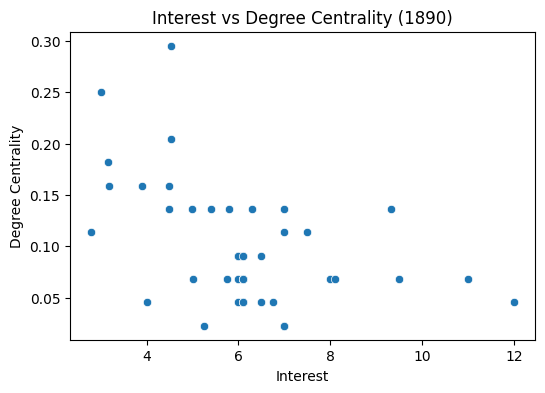


Year:1900

  Country  In-Degree Centrality  Betweenness Centrality  Closeness Centrality  \
0     BEL              0.181818                0.003215              0.222332   
1     ARG              0.159091                0.000000              0.245455   
2     BRA              0.136364                0.000440              0.215488   
3     DEU              0.295455                0.103705              0.300802   
4     FRA              0.204545                0.046434              0.232438   

   Eigenvector Centrality  debtburden  rlong  rshort      rgdp  rgdpcap  
0                0.206138    4.882136   3.15    4.09  17.02921  8.22443  
1                0.187375    6.844985   7.01    7.06  16.37536  7.92154  
2                0.166950    5.516892   6.97    9.20  16.31639  6.51915  
3                0.322775    2.106341   3.68    5.33  18.93528  8.00136  
4                0.242626    7.889122   2.98    3.21  18.53291  7.96416  


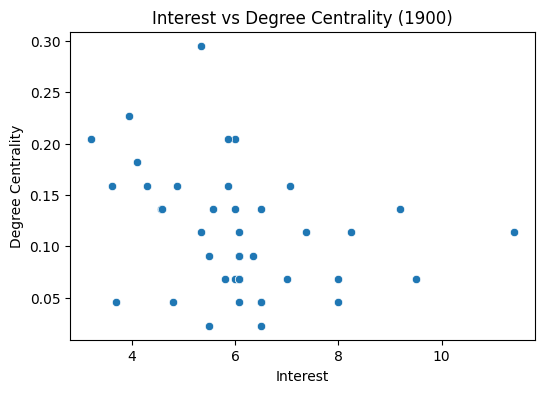


Year:1910

  Country  In-Degree Centrality  Betweenness Centrality  Closeness Centrality  \
0     BEL              0.181818                0.002263              0.220000   
1     ARG              0.181818                0.000634              0.253653   
2     BRA              0.136364                0.000978              0.255803   
3     DEU              0.318182                0.101064              0.305556   
4     ESP              0.090909                0.002658              0.234043   

   Eigenvector Centrality  debtburden  rlong  rshort      rgdp  rgdpcap  
0                0.183570    4.882136   3.15    4.09  17.02921  8.22443  
1                0.164025    6.844985   7.01    7.06  16.37536  7.92154  
2                0.147542    5.516892   6.97    9.20  16.31639  6.51915  
3                0.298002    2.106341   3.68    5.33  18.93528  8.00136  
4                0.107140   12.795040   5.29    3.69  17.31682  7.48773  


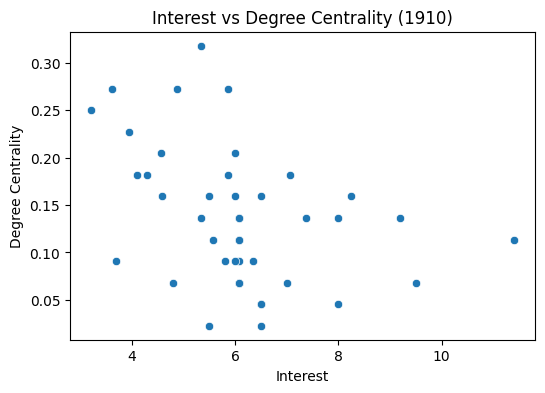

In [ ]:
import matplotlib.pyplot as plt
def centrality_scores(G):
  in_deg_cent=nx.in_degree_centrality(G)
  betweenness_cent=nx.betweenness_centrality(G)
  closeness_cent=nx.closeness_centrality(G)
  eigenvector_cent=nx.eigenvector_centrality(G, max_iter=1000)
  #Create dataframe
  df_centrality=pd.DataFrame({
      "Country":list(in_deg_cent.keys()),
      "In-Degree Centrality":list(in_deg_cent.values()),
      "Betweenness Centrality":list(betweenness_cent.values()),
      "Closeness Centrality":list(closeness_cent.values()),
      "Eigenvector Centrality":list(eigenvector_cent.values())
  })
  return df_centrality
#Economic data
econ_cols=['country_A','debtburden','rlong','rshort1890','rshort1900','rgdp','rgdpcap']
df_econ=df[econ_cols].drop_duplicates(subset='country_A').rename(columns={'country_A':'Country'})
df_econ.head()

#Correct interest rate
def get_rshort_column(year):
  if year ==1890:
    return "rshort1890"
  else:
    return "rshort1900"
for year, G in zip([1890,1900,1910],[G_1890,G_1900,G_1910]):
  #Centrality
  df_centrality=centrality_scores(G)
  #rshort
  rshort_col=get_rshort_column(year)

  #Economic dataframe for this year
  df_econ_year=df_econ[["Country","debtburden","rlong",rshort_col,"rgdp","rgdpcap"]].copy()
  df_econ_year.rename(columns={rshort_col:"rshort"},inplace=True)

  #Merging
  df_final=pd.merge(df_centrality,df_econ_year,on="Country",how="left")
  print(f"\nYear:{year}\n")
  print(df_final.head())

  #Scatter plots
  #GDP vs Degree Centrality
  #plt.figure(figsize=(6,4))
  #sns.scatterplot(data=df_final,x="rgdp",y="In-Degree Centrality")
  #plt.title(f"GDP vs Degree Centrality ({year})")
  #plt.xlabel("GDP")
  #plt.ylabel("Degree Centrality")
  #plt.show()
  #Debt vs Degree centrality
  #plt.figure(figsize=(6,4))
  #sns.scatterplot(data=df_final,x="debtburden",y="In-Degree Centrality")
  #plt.title(f"Debt vs Degree Centrality ({year})")
  #plt.xlabel("Debt")
  #plt.ylabel("Degree Centrality")
  #Interest vs Degree centrality
  plt.figure(figsize=(6,4))
  sns.scatterplot(data=df_final,x="rshort",y="In-Degree Centrality")
  plt.title(f"Interest vs Degree Centrality ({year})")
  plt.xlabel("Interest")
  plt.ylabel("Degree Centrality")
  plt.show()


**Suntask 3**

Year: 1890
                       Group  In-Degree Centrality  Betweenness Centrality  \
0          Democratic - Gold              0.141608                0.022891   
1      Democratic - Non-Gold              0.060606                0.000292   
2      Non-Democratic - Gold              0.080420                0.000906   
3  Non-Democratic - Non-Gold              0.089161                0.001438   

   Eigenvector Centrality  
0                0.185137  
1                0.086074  
2                0.115613  
3                0.110513  


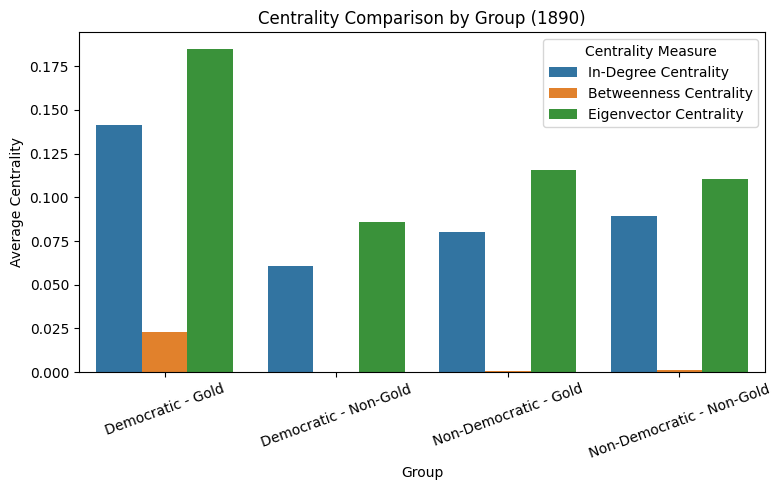

Year: 1900
                       Group  In-Degree Centrality  Betweenness Centrality  \
0          Democratic - Gold              0.150350                0.024006   
1      Democratic - Non-Gold              0.068182                0.000166   
2      Non-Democratic - Gold              0.097902                0.000773   
3  Non-Democratic - Non-Gold              0.101399                0.002750   

   Eigenvector Centrality  
0                0.179124  
1                0.086105  
2                0.122405  
3                0.121652  


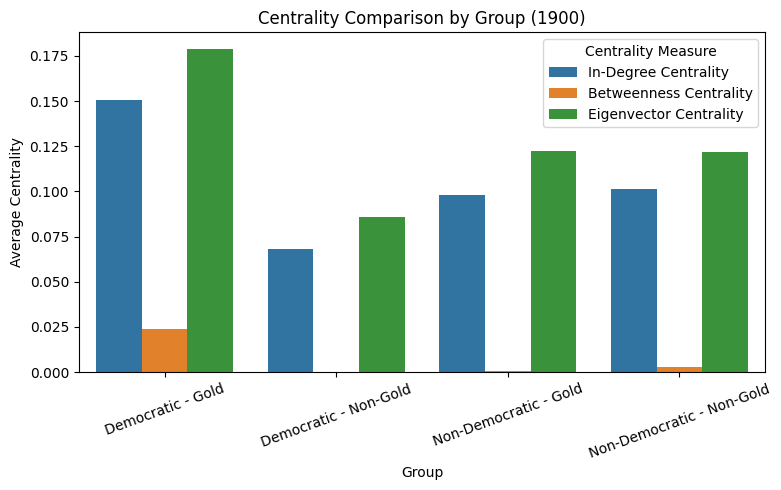

Year: 1910
                       Group  In-Degree Centrality  Betweenness Centrality  \
0          Democratic - Gold              0.183566                0.037018   
1      Democratic - Non-Gold              0.098485                0.001884   
2      Non-Democratic - Gold              0.118881                0.002436   
3  Non-Democratic - Non-Gold              0.113636                0.009238   

   Eigenvector Centrality  
0                0.181095  
1                0.100273  
2                0.120105  
3                0.111948  


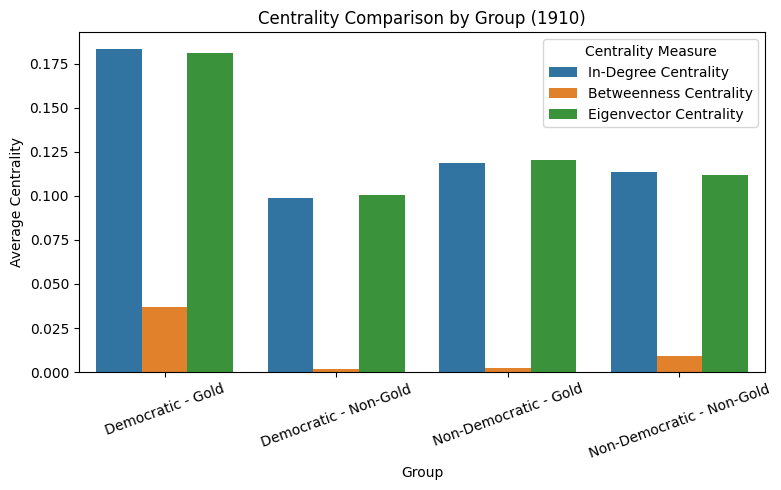

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def centrality_scores(G):
  in_deg_cent=nx.in_degree_centrality(G)
  betweenness_cent=nx.betweenness_centrality(G)
  closeness_cent=nx.closeness_centrality(G)
  eigenvector_cent=nx.eigenvector_centrality(G, max_iter=1000)
  #Create dataframe
  df_centrality=pd.DataFrame({
      "Country":list(in_deg_cent.keys()),
      "In-Degree Centrality":list(in_deg_cent.values()),
      "Betweenness Centrality":list(betweenness_cent.values()),
      #"Closeness Centrality":list(closeness_cent.values()),
      "Eigenvector Centrality":list(eigenvector_cent.values())
  })
  return df_centrality
#Democratic level data
df_demo=df[['country_A','poldemo','gold']].drop_duplicates(subset='country_A').rename(columns={'country_A':'Country'})
#df_demo.head()
#Democracy status
df_demo['Democracy'] = df_demo['poldemo'].apply(lambda x: 'Democratic' if x >= 0.5 else 'Non-Democratic')
#For all three year
for year, G in zip([1890,1900,1910],[G_1890,G_1900,G_1910]):
  print(f"Year: {year}")
  #Centrality
  df_centrality=centrality_scores(G)
  #Merge
  df_final=pd.merge(df_centrality,df_demo,on="Country",how="left")
  #print(df_final.head())
  #Seprate into 4 groups
  df_final['Group']=df_final.apply( lambda row:f"{row['Democracy']} - {'Gold' if row['gold']==1 else 'Non-Gold'}", axis=1)
  #print(df_final[['Country', 'Group', 'In-Degree Centrality', 'Betweenness Centrality', 'Eigenvector Centrality']].head())
  df_grouped = df_final.groupby("Group")[["In-Degree Centrality", "Betweenness Centrality", "Eigenvector Centrality"]].mean().reset_index()
  print(df_grouped)
  df_grouped_melted = df_grouped.melt(id_vars="Group",
                                        value_vars=["In-Degree Centrality", "Betweenness Centrality", "Eigenvector Centrality"],
                                        var_name="Centrality Measure",
                                        value_name="Average Centrality")

  plt.figure(figsize=(8,5))
  sns.barplot(data=df_grouped_melted, x="Group", y="Average Centrality", hue="Centrality Measure")
  plt.title(f"Centrality Comparison by Group ({year})")
  plt.xlabel("Group")
  plt.ylabel("Average Centrality")
  plt.xticks(rotation=20)
  plt.legend(title="Centrality Measure")
  plt.tight_layout()
  plt.show()


In [ ]:
df['poldemo'].min()


0.0

**Task 4**

**Subtask 1**


=== Robustness Analysis based on Average Shortest Path (1890) ===


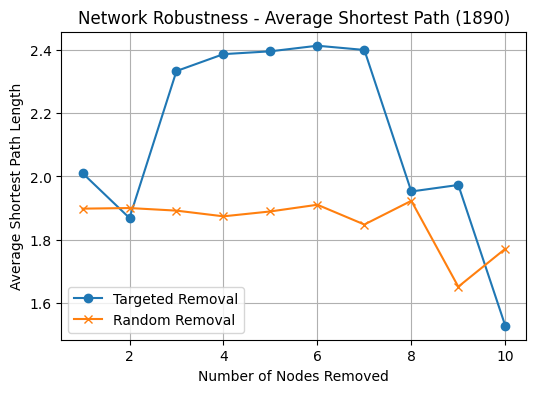


=== Robustness Analysis based on Average Shortest Path (1900) ===


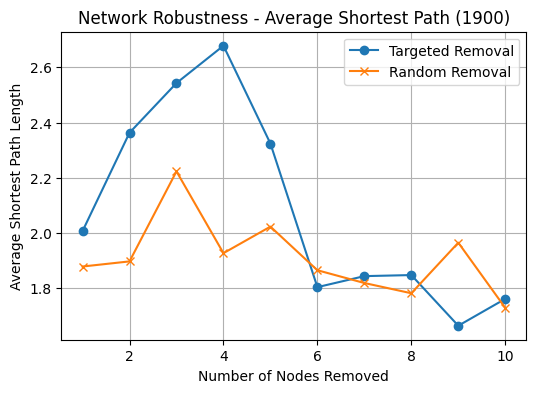


=== Robustness Analysis based on Average Shortest Path (1910) ===


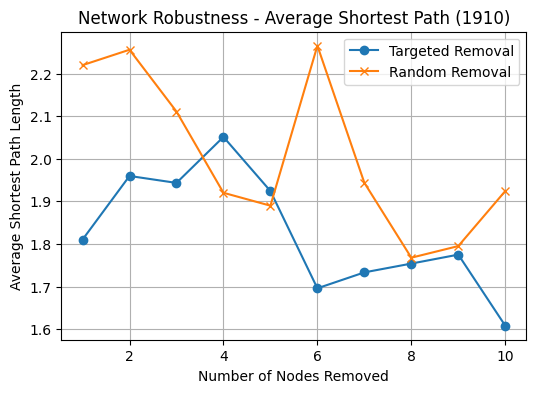

In [ ]:
import random
""""
#Largest weakly connected component
def compute_avg_shortest_path(G):
  if nx.is_weakly_connected(G):

    #return len(max(nx.weakly_connected_components(G), key=len))
    return nx.average_shortest_path_length(G)
  else:
    largest_component=max(nx.weakly_connected_components(G),key=len)
    G_subgraph=G.subgraph(largest_component).copy()
    if len(G_subgraph)>1:
      return nx.average_shortest_path_length(G_subgraph)
    else:
      return 0
#Simulate node removal
def simulate_removal_shortest_path(G_original,strategy,num_remove):
  G=G_original.copy()

  #Get list of nodes
  nodes=list(G.nodes())
  #Decide which nodes to remove
  if strategy == 'targeted':
    #In-Degree centrality
    in_deg_cent=nx.in_degree_centrality(G)
    sorted_nodes=sorted(in_deg_cent.items(),key=lambda x:x[1],reverse=True)
    nodes_to_remove=[node for node,_ in sorted_nodes[:num_remove]]
  elif strategy == 'random':
    nodes_to_remove=random.sample(list(G.nodes()),num_remove)

  #Ramdon nodes
  G.remove_nodes_from(nodes_to_remove)

  #Compute largest weakly connected component size after removal
  #if len(G)>0:
   # return largest_weakly_connected_component(G)
  #lse:
    #return 0
  if len(G)>1:
      return compute_avg_shortest_path(G)

  else:
    return 0
      #return 0

#Apply simulation for each year
for year, G in zip([1890,1900,1910],[G_1890,G_1900,G_1910]):

  print(f"\nRobustness analysis for {year}")

  #Prepare data to store rsults
  removals=list(range(1,11)) #Remove 1 to 10 nodes
  targeted_results=[]
  random_results=[]

  for r in removals:
    #Targeted
    target_size=simulate_removal_shortest_path(G,strategy='targeted',num_remove=r)
    random_size=simulate_removal_shortest_path(G,strategy='random',num_remove=r)
    targeted_results.append(target_size)
    random_results.append(random_size)
  plt.figure(figsize=(6,4))
  plt.plot(removals, targeted_results, marker='o', label='Targeted Removal')
  plt.plot(removals, random_results, marker='x', label='Random Removal')
  plt.xlabel("Number of Nodes Removed")
  plt.ylabel("Average Shortest Path Length")
  plt.title(f"Network Robustness Curve ({year})")
  plt.legend()
  plt.grid(True)
  plt.show()
"""""
import random
def compute_avg_shortest_path_directed(G):
    # If graph is strongly connected
    if nx.is_strongly_connected(G):
        return nx.average_shortest_path_length(G)
    else:
        # Compute Average Shortest Path over reachable pairs (standard for directed networks)
        path_lengths = dict(nx.all_pairs_shortest_path_length(G))
        total_length = 0
        count = 0
        for source in path_lengths:
            for target in path_lengths[source]:
                if source != target:
                    total_length += path_lengths[source][target]
                    count += 1
        if count > 0:
            return total_length / count
        else:
            return 0
def simulate_removal_shortest_path(G_original, strategy, num_remove):
    G = G_original.copy()
    nodes = list(G.nodes())

    if strategy == 'targeted':
        #in_deg_cent = nx.in_degree_centrality(G)
        #nodes_sorted = sorted(in_deg_cent.items(), key=lambda x: x[1], reverse=True)
        #nodes_to_remove = [node for node, _ in nodes_sorted[:num_remove]]
        betweeness=nx.betweenness_centrality(G)
        nodes_sorted=sorted(betweeness.items(),key=lambda x:x[1],reverse=True)
        nodes_to_remove=[node for node,_ in nodes_sorted[:num_remove]]
    elif strategy == 'random':
        nodes_to_remove = random.sample(nodes, num_remove)

    G.remove_nodes_from(nodes_to_remove)

    if len(G) > 1:
        return compute_avg_shortest_path_directed(G)
    else:
        return 0

for year, G in zip([1890, 1900, 1910], [G_1890, G_1900, G_1910]):

    print(f"\n=== Robustness Analysis based on Average Shortest Path ({year}) ===")

    removals = list(range(1, 11))  # Remove 1 to 10 nodes progressively
    targeted_result = []
    random_result = []

    for r in removals:
        targeted_aspl = simulate_removal_shortest_path(G, strategy='targeted', num_remove=r)
        random_aspl = simulate_removal_shortest_path(G, strategy='random', num_remove=r)
        targeted_result.append(targeted_aspl)
        random_result.append(random_aspl)
    plt.figure(figsize=(6,4))
    plt.plot(removals, targeted_result, marker='o', label='Targeted Removal')
    plt.plot(removals, random_result, marker='x', label='Random Removal')
    plt.xlabel("Number of Nodes Removed")
    plt.ylabel("Average Shortest Path Length")
    plt.title(f"Network Robustness - Average Shortest Path ({year})")
    plt.legend()
    plt.grid(True)
    plt.show()



=== Centrality Degradation Analysis (1890) ===


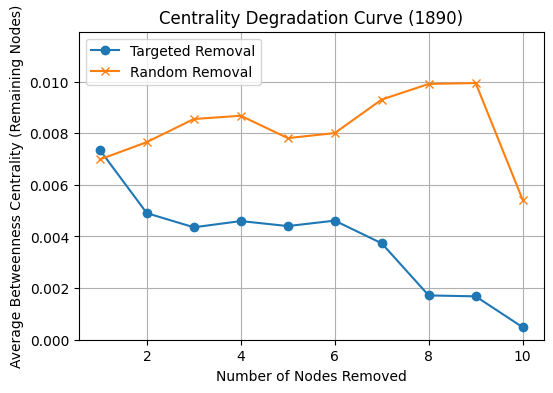


=== Centrality Degradation Analysis (1900) ===


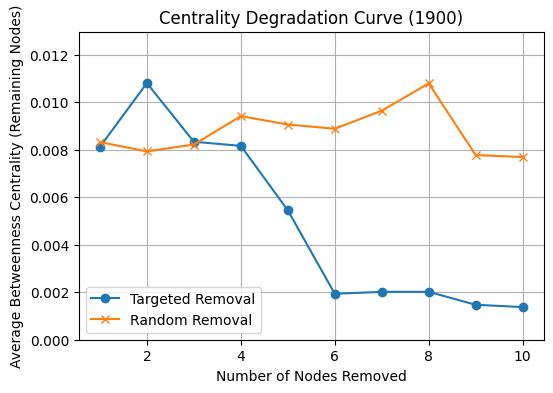


=== Centrality Degradation Analysis (1910) ===


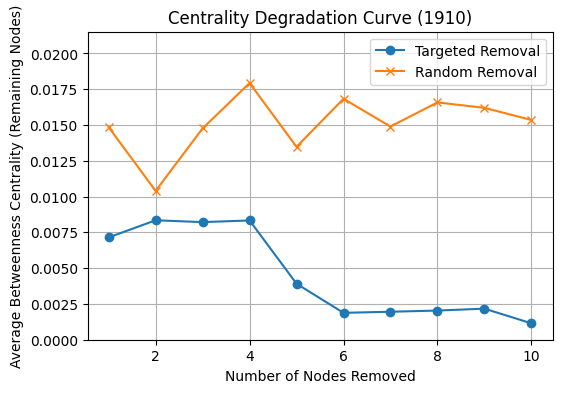

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ----------------------------------
# Centrality Distribution after Node Removal
# ----------------------------------

def simulate_removal_centrality(G_original, strategy, num_remove, centrality_type='betweenness'):
    G = G_original.copy()
    nodes = list(G.nodes())

    # -------- Targeted or Random Node Removal --------
    if strategy == 'targeted':
        if centrality_type == 'in-degree':
            scores = nx.in_degree_centrality(G)
        elif centrality_type == 'betweenness':
            scores = nx.betweenness_centrality(G)
        elif centrality_type == 'eigenvector':
            scores = nx.eigenvector_centrality(G, max_iter=1000)
        else:
            raise ValueError("Choose from ['in-degree', 'betweenness', 'eigenvector']")

        nodes_sorted = sorted(scores.items(), key=lambda x: x[1], reverse=True)
        nodes_to_remove = [node for node, _ in nodes_sorted[:num_remove]]

    elif strategy == 'random':
        nodes_to_remove = random.sample(nodes, num_remove)

    else:
        raise ValueError("Strategy must be 'targeted' or 'random'")

    # -------- Remove nodes --------
    G.remove_nodes_from(nodes_to_remove)

    # -------- Recompute Centrality of Remaining Nodes --------
    if centrality_type == 'in-degree':
        new_centrality = nx.in_degree_centrality(G)
    elif centrality_type == 'betweenness':
        new_centrality = nx.betweenness_centrality(G)
    elif centrality_type == 'eigenvector':
        new_centrality = nx.eigenvector_centrality(G, max_iter=1000)

    # Return average centrality of remaining nodes
    if len(new_centrality) > 0:
        avg_cent = sum(new_centrality.values()) / len(new_centrality)
    else:
        avg_cent = 0

    return avg_cent

# ----------------------------------
# Apply to Each Year (Targeted vs Random)
# ----------------------------------

for year, G in zip([1890, 1900, 1910], [G_1890, G_1900, G_1910]):
    print(f"\n=== Centrality Degradation Analysis ({year}) ===")

    removals = list(range(1, 11))  # Removing 1 to 10 nodes
    targeted_avg_centrality = []
    random_avg_centrality = []

    # ------- Choose which centrality to track -------
    centrality_type = 'betweenness'   # Change to 'in-degree' or 'eigenvector' if you want

    for r in removals:
        target_result = simulate_removal_centrality(G, strategy='targeted', num_remove=r, centrality_type=centrality_type)
        random_result = simulate_removal_centrality(G, strategy='random', num_remove=r, centrality_type=centrality_type)
        targeted_avg_centrality.append(target_result)
        random_avg_centrality.append(random_result)

    # ----------------------------------
    # Plot
    # ----------------------------------

    plt.figure(figsize=(6,4))
    plt.plot(removals, targeted_avg_centrality, marker='o', label='Targeted Removal')
    plt.plot(removals, random_avg_centrality, marker='x', label='Random Removal')
    plt.xlabel("Number of Nodes Removed")
    plt.ylabel(f"Average {centrality_type.capitalize()} Centrality (Remaining Nodes)")
    plt.title(f"Centrality Degradation Curve ({year})")
    plt.ylim(0, max(max(targeted_avg_centrality), max(random_avg_centrality)) * 1.2)
    plt.legend()
    plt.grid(True)
    plt.show()



=== SI Simulation for 1890 ===


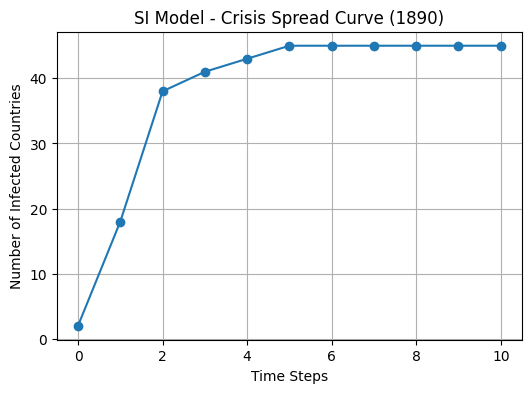


=== SI Simulation for 1900 ===


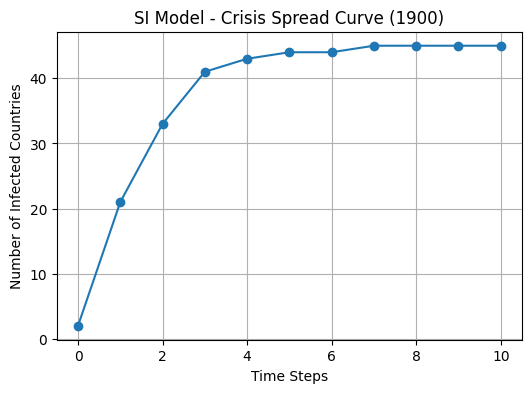


=== SI Simulation for 1910 ===


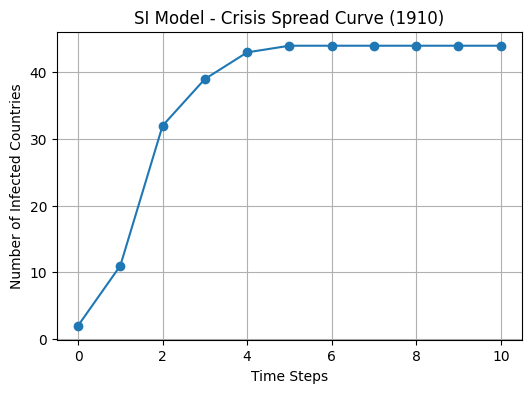

In [ ]:
# ===============================
# Task 4 - Subtask 2 - SI Epidemic Simulation
# ===============================

import random

def SI_simulation(G, initial_infected, beta=0.3, steps=10):
    # Step 1: Initialize all nodes as susceptible (S)
    status = {node: 'S' for node in G.nodes()}

    # Step 2: Infect initial nodes
    for node in initial_infected:
        status[node] = 'I'

    infected_counts = [len(initial_infected)]

    # Step 3: Simulation Loop
    for t in range(steps):
        new_infected = []
        for node in G.nodes():
            if status[node] == 'I':
                neighbors = G.successors(node)  # Spread along outgoing edges
                for neighbor in neighbors:
                    if status[neighbor] == 'S' and random.random() < beta:
                        new_infected.append(neighbor)

        # Update statuses
        for node in new_infected:
            status[node] = 'I'

        infected_counts.append(sum(1 for s in status.values() if s == 'I'))

    return infected_counts

# -----------------------------
# Example for all 3 years
# -----------------------------

for year, G in zip([1890, 1900, 1910], [G_1890, G_1900, G_1910]):
    print(f"\n=== SI Simulation for {year} ===")

    # Select top 1 or 2 most central countries as initial infected
    in_deg_cent = nx.in_degree_centrality(G)
    top_nodes = sorted(in_deg_cent.items(), key=lambda x: x[1], reverse=True)[:2]
    initial_infected = [node for node, cent in top_nodes]

    # Run Simulation
    infected_counts = SI_simulation(G, initial_infected, beta=0.3, steps=10)

    # Plot Infection Curve
    plt.figure(figsize=(6,4))
    plt.plot(range(0, 11), infected_counts, marker='o')
    plt.title(f"SI Model - Crisis Spread Curve ({year})")
    plt.xlabel("Time Steps")
    plt.ylabel("Number of Infected Countries")
    plt.grid(True)
    plt.show()


